In [1]:
import tensorflow as tf

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

5


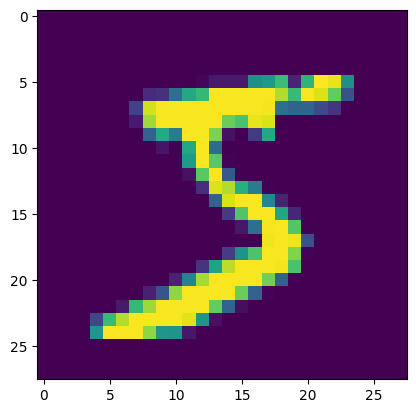

In [4]:
import matplotlib.pyplot as plt
print(y_train[0])
plt.imshow(x_train[0])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

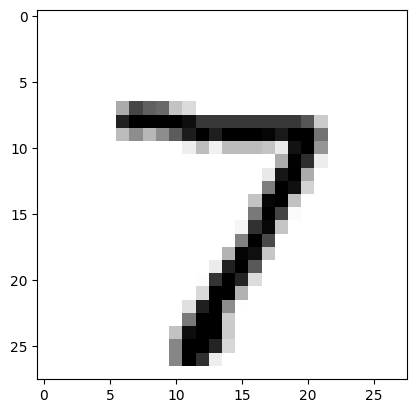

In [5]:
x_train=x_train/255
x_test=x_test/255
print(x_train[0])
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [6]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(.2))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(.2))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3021 - accuracy: 0.9089
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1481 - accuracy: 0.9556
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1146 - accuracy: 0.9654
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0966 - accuracy: 0.9693
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0860 - accuracy: 0.9722


In [8]:
val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.0800 - accuracy: 0.9770
0.08003999292850494
0.9769999980926514


In [9]:
model.save(r"C:/Users/edrie\Documents/New folder (2)/classfication_mnist_numbers\models/model.h5")
new_model = tf.keras.models.load_model(r"C:/Users/edrie\Documents/New folder (2)/classfication_mnist_numbers\models/model.h5")
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trai

In [11]:
convertor=tf_model=tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model=convertor.convert()

with open('mnist_model.tflite', 'wb') as f:
    f.write(tflite_model)
model.save('C:/Users/edrie/Documents/New folder (2)/classfication_mnist_numbers/models/tf_lite_model.tflite')

INFO:tensorflow:Assets written to: C:\Users\edrie\AppData\Local\Temp\tmp_3p5js4l\assets


INFO:tensorflow:Assets written to: C:\Users\edrie\AppData\Local\Temp\tmp_3p5js4l\assets


INFO:tensorflow:Assets written to: C:/Users/edrie/Documents/New folder (2)/classfication_mnist_numbers/models/tf_lite_model.tflite\assets


INFO:tensorflow:Assets written to: C:/Users/edrie/Documents/New folder (2)/classfication_mnist_numbers/models/tf_lite_model.tflite\assets
